# Movie Recommender

## Problem Statement: 

- **Build a movie Recommender System which can recommender some movie's based on user preference history.**


- **Tasks performed:**
 - 1) Create recommender system using ratings.csv file. 
 - 2)	Display predicted rating for a particular userID and MovieID combinations (both taken as keyboard input)
 - 3)	Recommend a user to watch top 10 movies, which has not watched yet (as per his rating predictions). Take userID as             a keyboard input. Fix the threshold rating as 2.5
 - 4)	Display the MovieID, IMDB ID, Average User Rating (excluding predictions), genres and tag of all the movies found               in Step 3 as a data frame.



### import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Loading All the Datasets

In [4]:
tag = pd.read_csv("tags.csv")
tag.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [5]:
links = pd.read_csv("links.csv")
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Let's explore the rating dataset on which we will build the Recommendation system

In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
ratings.shape

(100836, 4)

- **We can say that the rating dataset is having 100836 observations and 4 features**

In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [11]:
ratings['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

- **So here the rating scale is between 0 to 5.** 

In [12]:
ratings['rating'].min()

0.5

- **minumum rating is 0.5**

In [13]:
ratings['rating'].max()

5.0

- **maximum rating is 5**

In [14]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [15]:
ratings['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

- **By seeing count we can say that 4 rating is given by most user, than rating 3 and so on.**

### Data Visualization

In [17]:
import seaborn as sns

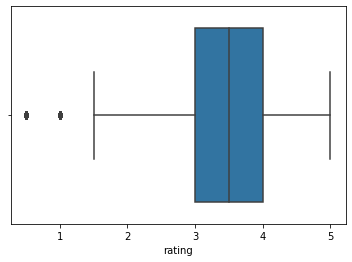

In [18]:
sns.boxplot(ratings['rating'])

- **By plotting boxplot we can say thier are very less outliers say, two.**

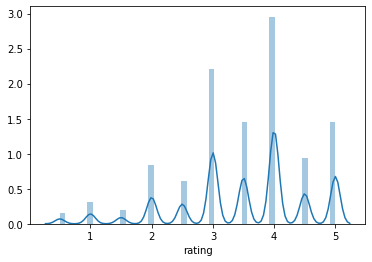

In [19]:
sns.distplot(ratings['rating'])

- **By seeing this graph we can say that 4 rating is given by most user, than rating 3 and so on.**

### Checking null values

In [22]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [23]:
import seaborn as sns

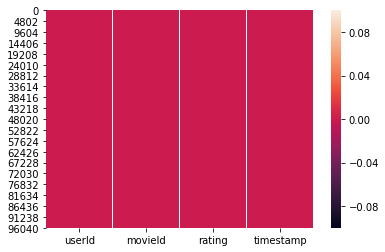

In [24]:
sns.heatmap(ratings.isnull())

- **There is no null values in this dataset.**

### Importing some of the libraries which is required to build the recommedation system from the Surprise package

In [25]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [26]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [27]:
ratings['userId'].count()

100836

(array([ 8791., 10332.,  8003.,  8822., 10673.,  8590., 11151., 12109.,
         6309., 16056.]),
 array([  1. ,  61.9, 122.8, 183.7, 244.6, 305.5, 366.4, 427.3, 488.2,
        549.1, 610. ]),
 <a list of 10 Patch objects>)

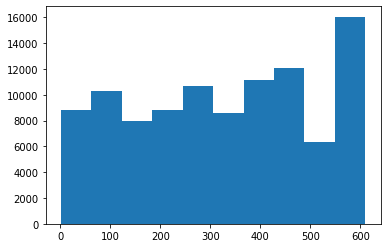

In [28]:
plt.hist(ratings['userId'])

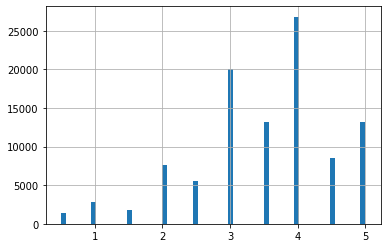

In [29]:
ratings['rating'].hist(bins=60)

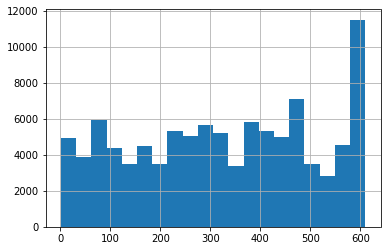

In [30]:
ratings['userId'].hist(bins=20)

In [31]:
ratings.groupby("userId")[['userId']].count()

,userId
userId,
1,232
2,29
3,39
4,216
5,44
...,...
606,1115
607,187
608,831


## Let's build the Recommender System Now using ratings dataset

In [ ]:
## loading the dataset with the required column

In [34]:
reader = Reader(rating_scale =(0,5))
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)

In [ ]:
## splitting dataset into training and testing datasets

In [35]:
[trainset,testset] = train_test_split(data, test_size = 0.15, shuffle = True)

In [37]:
## Find similarity using KNN and cosine similarity formalua 

In [38]:
recom = KNNWithMeans(k=50, sim_options = {'name':'cosine','user_based': True})
recom.fit(data.build_full_trainset())       # using full training set and
test_pred = recom.test(testset)
RMSE = accuracy.rmse(test_pred)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7713


In [39]:
#test_pred

## Taking Input From the User from KeyBoard & Displaying predicted rating for a particular userID and MovieID combinations 

In [40]:
userId = int(input("Enter userId: "))
movieId = int(input("Enter movieId: "))
print("The rating value for  userID:",userId, "and", "movieID:",movieId, "is :",round((recom.predict(userId,movieId)[3]),3))

Enter userId: 7
Enter movieId: 8
The rating value for  userID: 7 and movieID: 8 is : 2.611


=================================================================

### Merging ratings and movies datasets

In [41]:
movie_data = pd.merge(ratings, movies, on='movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [42]:
import numpy as np
from scipy.sparse import csr_matrix         # compressed sparsh matrix
from sklearn.neighbors import NearestNeighbors 
import sklearn

In [43]:
user_movie_rating_1= movie_data.pivot_table(index='title', columns='userId', values='rating').fillna(0)
user_movie_rating_1.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
movie_data_matrix = csr_matrix(user_movie_rating_1.values)
movie_data_matrix

<9719x610 sparse matrix of type '<class 'numpy.float64'>'
	with 100832 stored elements in Compressed Sparse Row format>

In [46]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm='brute')
model_knn.fit(movie_data_matrix)                                   # here .fit will take only compressed_matrix and we
                                                                  # cannot pass dataframe and fit will calculate distance here 
    

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

#### Similar Movies for Movie 1

In [47]:
query_index1 = 0    # 1st movie
distances, indices = model_knn.kneighbors(
                     user_movie_rating_1.iloc[query_index1, :].values.reshape(1,-1),
                      n_neighbors = 11)

print('Similar Movies for {0}\n'.format(user_movie_rating_1.index[query_index1]))
for i in indices.flatten()[1:]:
    print(user_movie_rating_1.index[i])

Similar Movies for '71 (2014)

Invincible Shaolin (1978)
Digimon: The Movie (2000)
Digging Up the Marrow (2014)
Tokyo! (2008)
Tournament, The (2009)
Ginger Snaps: Unleashed (2004)
Robin-B-Hood (Bo bui gai wak) (2006)
Little Big Soldier (Da bing xiao jiang) (2010)
Ginger Snaps Back: The Beginning (2004)
Beyond Re-Animator (2003)


#### Similar Movies for Movie 2

In [48]:
query_index2 = 1    # 2nd movie
distances, indices = model_knn.kneighbors(
                     user_movie_rating_1.iloc[query_index2, :].values.reshape(1,-1),
                      n_neighbors = 11)

print('Similar Movies for {0}\n'.format(user_movie_rating_1.index[query_index2]))
for i in indices.flatten()[1:]:
    print(user_movie_rating_1.index[i])

Similar Movies for 'Hellboy': The Seeds of Creation (2004)

Space Battleship Yamato (2010)
'Hellboy': The Seeds of Creation (2004)
All the Right Moves (1983)
Hidden Fortress, The (Kakushi-toride no san-akunin) (1958)
...And Justice for All (1979)
'Round Midnight (1986)
Kagemusha (1980)
Sanjuro (Tsubaki Sanjûrô) (1962)
Ghost Rider: Spirit of Vengeance (2012)
Throne of Blood (Kumonosu jô) (1957)


#### Similar Movies for Movie 3

In [49]:
query_index3 = 2    # 3rd movie
distances, indices = model_knn.kneighbors(
                     user_movie_rating_1.iloc[query_index3, :].values.reshape(1,-1),
                      n_neighbors = 11)

print('Similar Movies for {0}\n'.format(user_movie_rating_1.index[query_index3]))
for i in indices.flatten()[1:]:
    print(user_movie_rating_1.index[i])

Similar Movies for 'Round Midnight (1986)

Angry Red Planet, The (1959)
American Friend, The (Amerikanische Freund, Der) (1977)
Asphyx, The (1973)
Annie Get Your Gun (1950)
Agony and the Ecstasy, The (1965)
Atragon (Kaitei Gunkan) (1963)
Amazing Transparent Man, The (1960)
Attack of the Crab Monsters (1957)
And Starring Pancho Villa as Himself (2003)
'Hellboy': The Seeds of Creation (2004)


---

## Recommend a user to watch top 10 movies, which has not watched yet (as per his rating predictions). Take userID as a keyboard input. Fix the threshold rating as 2.5

In [50]:
movie_lst = {} # Creating empty dictionary to append userid as key and movie id is value

user_id = int(input("Enter the user id: "))
for movie_id in range(1,193609):
    if recom.predict(user_id,movie_id)[3] > 2.5:
        movie_lst[movie_id] = recom.predict(user_id,movie_id)[3]

# finding 10 highest values in a Dictionary  
  
from collections import Counter
k = Counter(movie_lst)

high = k.most_common(10)
print("\n")

#printing those 10 recomended movie
print("Recommonded Top 10 movies for userId {0} are listed below\n".format(user_id))



# suuggesting 10  movies 
for i in range(10):
    print(i+1,"-->",list(movies[movies.movieId==high[i][0]]["title"])[0])

Enter the user id: 6


Recommonded Top 10 movies for userId 6 are listed below

1 --> Denise Calls Up (1995)
2 --> Babes in Toyland (1934)
3 --> On the Beach (1959)
4 --> Bossa Nova (2000)
5 --> Man with the Golden Arm, The (1955)
6 --> Slumber Party Massacre II (1987)
7 --> Slumber Party Massacre III (1990)
8 --> Sorority House Massacre (1986)
9 --> Sorority House Massacre II (1990)
10 --> Two Family House (2000)


==========================================================================

## Display the MovieID, IMDB ID, Average User Rating (excluding predictions), genres and tag of all the movies found in Step 3 as a data frame.

##### Finding the mean rating for all the movies

In [51]:
avg_rating = {}

for i in range(1,193609):
    if (i==33)|(i==35)|(i==37):         # In these movieId the rating is missing so we will no considered it and we will pass
        pass
    else:
        avg_rating[i] = round((ratings[ratings.movieId == i]['rating'].mean()),2) # finding avg rating

#print(avg_rating)

#### Merging all the datasets

In [52]:
md = pd.merge(ratings[["movieId","rating"]],tag[["movieId","tag"]],how="left",on="movieId")
md2 = pd.merge(md,links[["movieId","imdbId"]],how="left",on="movieId")
md3 = pd.merge(md2,movies[["movieId","genres"]],how="left",on="movieId")
md3.head()

,movieId,rating,tag,imdbId,genres
0,1,4.0,pixar,114709,Adventure|Animation|Children|Comedy|Fantasy
1,1,4.0,pixar,114709,Adventure|Animation|Children|Comedy|Fantasy
2,1,4.0,fun,114709,Adventure|Animation|Children|Comedy|Fantasy
3,3,4.0,moldy,113228,Comedy|Romance
4,3,4.0,old,113228,Comedy|Romance


#### Printing MovieID, IMDB ID,Average User Rating,genres and tag for all the movies of above userid

In [53]:
ls = []

for i in range(10):
    ls.append(high[i][0])
md4 = md3[md3["movieId"].isin(ls)]


In [54]:
ls

[633, 3086, 3379, 3567, 3678, 3939, 3940, 3941, 3942, 3951]

In [55]:
md4

,movieId,rating,tag,imdbId,genres
129864,3086,5.0,NaN,24852,Children|Comedy|Fantasy|Musical
153010,3567,5.0,NaN,180837,Comedy|Drama|Romance
189301,3951,5.0,In Netflix queue,202641,Drama
246201,3939,5.0,NaN,93996,Horror
246202,3940,5.0,NaN,100639,Horror
246203,3941,5.0,NaN,91990,Horror
246204,3942,5.0,NaN,100663,Horror
249016,633,5.0,NaN,112844,Comedy
249685,3678,5.0,NaN,48347,Drama
271220,3379,4.5,NaN,53137,Drama


#### Now dropping rating column and as we need the avg_rating of movies in our dataframe

In [56]:

#md4 = md4.drop("rating",axis=1) #once you drop this column do not run it just comment it

In [47]:
#md4

In [57]:
id_rating_pair = [(x,y) for x,y in avg_rating.items() if x in ls]

new_rating = []
for i in range(len(id_rating_pair)):
    new_rating.append(id_rating_pair[i][1])

In [58]:
new_rating

[5.0, 5.0, 4.5, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

#### Now we are Sorting movieId in ascending order and adding a new column avg_rating

In [59]:

md5 = md4.sort_values(by="movieId")
md5["avg_rating"] = new_rating
md5


,movieId,tag,imdbId,genres,avg_rating
249016,633,NaN,112844,Comedy,5.0
129864,3086,NaN,24852,Children|Comedy|Fantasy|Musical,5.0
271220,3379,NaN,53137,Drama,4.5
153010,3567,NaN,180837,Comedy|Drama|Romance,5.0
249685,3678,NaN,48347,Drama,5.0
246201,3939,NaN,93996,Horror,5.0
246202,3940,NaN,100639,Horror,5.0
246203,3941,NaN,91990,Horror,5.0
246204,3942,NaN,100663,Horror,5.0
189301,3951,In Netflix queue,202641,Drama,5.0


**This is our final required dataframe**

**--------------------------------------------------------------------------------------------------------------------------**